<a href="https://colab.research.google.com/github/JoelGV/ClasificacionEmailSpam/blob/main/ClasificacionEmailSpam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de correos spam
En el siguiente proyecto de procesamiento de lenguaje natural se clasifican los correos que son spam mediante redes neuronales recurrentes.

In [ ]:
import pandas as pd
import numpy as np
import re
from scipy import stats

### Base de datos etiquetada para clasificar emails spam
Fuente: https://www.kaggle.com/harshsinha1234/email-spam-classification

In [ ]:
dataset_RNN = pd.read_csv('emails_RNN.csv')

In [ ]:
dataset_RNN.head()

,text,spam,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
0,Subject: naturally irresistible your corporate...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: the stock trading gunslinger fanny i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Subject: unbelievable new homes made easy im ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Subject: 4 color printing special request add...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Subject: do not have money , get software cds ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Selección de la información

In [ ]:
# Aislamos las columnas que nos interesan
dataset_RNN = dataset_RNN[['text', 'spam']]
dataset_RNN

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5726,"Subject: re : receipts from visit jim , than...",0
5727,Subject: re : enron case study update wow ! a...,0
5728,"Subject: re : interest david , please , call...",0
5729,Subject: news : aurora 5 . 2 update aurora ve...,0


In [ ]:
dataset_RNN[dataset_RNN['spam'] == '1']

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


## Limpieza de los datos

Limpieza de registros faltantes

In [ ]:
dataset_RNN.query('spam != "1" and spam != "0"')

,text,spam
1380,Subject: from the enron india newsdesk - april...,NaN
1381,e dpc contributed only 0 . 7 per cent of the ...,its termination would not have such a phenom...
2651,Subject: from the enron india newsdesk - april...,NaN
2652,lf against undeserved claims in the event of e...,mr suresh prabhu


In [ ]:
indices_a_eliminar = dataset_RNN.query('spam != "1" and spam != "0"').index
print(indices_a_eliminar)

Int64Index([1380, 1381, 2651, 2652], dtype='int64')


In [ ]:
dataset_RNN = dataset_RNN.drop(index=indices_a_eliminar)

In [ ]:
# Creación de variables con correos y sus clases
correos = list(dataset_RNN.text)
clases = list(dataset_RNN.spam)

In [ ]:
correos[0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

Limpieza de signos de puntuación

In [ ]:
# Pruebas con las expresiones regulares
txt = "The raine in Spain"
x = re.findall(r"\brai", txt)
x2 = re.findall(r"\brai\b", txt)
print(x)
print(x2) 

['rai']
[]


In [ ]:
for i in range(len(correos)):
  correos[i] = re.sub('-', ' ', correos[i])
  correos[i] = re.sub('_', '', correos[i])
  correos[i] = re.sub(r'[^\w\s]', '', correos[i])
  correos[i] = re.sub('  +', ' ', correos[i])
correos[0]

'Subject naturally irresistible your corporate identity lt is really hard to recollect a company the market is full of suqgestions and the information isoverwhelminq but a good catchy logo stylish statlonery and outstanding website will make the task much easier we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader it isguite ciear that without good products effective business organization and practicable aim it will be hotat nowadays market but we do promise that your marketing efforts will become much more effective here is the list of clear benefits creativeness hand made original logos specially done to reflect your distinctive company image convenience logo and stationery are provided in all formats easy to use content management system letsyou change your website content and even its structure promptness you will see logo drafts within three business days affordability your marketing break through shouldn t make gaps in your budget 100

## Creación de vectores a partir del texto 

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_NB_WORDS = 10000
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)

tokenizer.fit_on_texts(correos)

In [ ]:
correos_token = tokenizer.texts_to_sequences(correos)

In [ ]:
correos_token[500]

[14,
 296,
 9,
 168,
 26,
 229,
 20,
 59,
 257,
 508,
 9,
 5,
 168,
 3891,
 229,
 103,
 43,
 17,
 251,
 2184,
 9,
 2188,
 5,
 649,
 3891,
 229,
 3754,
 6,
 442,
 48,
 2908,
 11,
 494,
 76,
 3,
 6,
 27,
 19,
 1,
 4,
 16,
 181,
 312,
 33,
 274,
 3754,
 16,
 76,
 12,
 3463,
 3,
 6,
 44,
 9,
 5,
 2237,
 278,
 229,
 3754,
 6,
 23,
 622,
 257,
 835,
 3,
 6,
 186,
 2,
 23,
 16,
 4756,
 8606,
 3,
 278,
 34,
 6,
 23,
 1,
 1563,
 76,
 834,
 3,
 177,
 2,
 124,
 26,
 5,
 3825,
 34,
 16,
 195,
 57,
 451,
 2,
 2279,
 4,
 406,
 516,
 34,
 6,
 92,
 48,
 1349,
 229,
 9,
 3927,
 1401,
 1150,
 3607,
 34,
 6,
 44,
 296,
 9,
 5,
 2556,
 649,
 229,
 20,
 27,
 24,
 16,
 349,
 129,
 199,
 42,
 287,
 39,
 216]

In [ ]:
max_length = 0
for i in correos_token:
  if len(i) > max_length:
    max_length = len(i)
max_length

4899

In [ ]:
# Longitude de palabras para cada correo
max_length = 300

In [ ]:
correos_padded = pad_sequences(correos_token, maxlen = max_length)

In [ ]:
correos_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,   14, 5792,   16,  514, 1773, 3891,   12,  455,
        900,    2, 4383,    5,  110,    1,  116,   12,  397,    4, 6269,
          3,    1,   66, 9129,   75,    5,  168, 4489,  827, 6032, 6033,
          3, 1699,  287,   22,  124,    1, 2145,  2

### Preprocesamiento de las etiquetas

In [ ]:
clases = list(map(lambda x:int(x), clases))
#clases2 = []
#for i in range(len(clases)):
#  if clases[i] == 'spam':
#    clases2.append(1)
#  else:
#    clases2.append(0)

In [ ]:
clases = np.array(clases)

### Construcción de conjuntos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(correos_padded, clases, test_size = 0.2)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4581, 300)
(4581,)
(1146, 300)
(1146,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras import backend, optimizers, callbacks
import matplotlib.pyplot as plt

In [ ]:
# Vector representativo de cada palabra
embedding_dim = 128

In [ ]:
# Con esta instrucción eliminamos información previa de los modelos.
backend.clear_session()

In [ ]:
# Definición del modelo
modelo3 = Sequential()
modelo3.add(Embedding(input_dim = MAX_NB_WORDS, output_dim = embedding_dim, input_length = max_length))
#modelo3.add(Dropout(0.30))
modelo3.add(LSTM(60, return_sequences = True))
#modelo3.add(Dropout(0.30))
modelo3.add(LSTM(60, return_sequences = True))
#modelo3.add(Dropout(0.30))
modelo3.add(Dense(1, use_bias = True, activation = 'sigmoid'))
modelo3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 300, 60)           45360     
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 60)           29040     
_________________________________________________________________
dense (Dense)                (None, 300, 1)            61        
Total params: 1,354,461
Trainable params: 1,354,461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilación del modelo
Adam = optimizers.Adam(learning_rate = 0.001)
modelo3.compile(optimizer=Adam, loss='binary_crossentropy', metrics=['accuracy'])
checkpointer3 = callbacks.ModelCheckpoint('modeloCorreos.h5', monitor = 'accuracy', save_best_only = True, 
                                         mode = 'max')
# Entrenamiento
M = modelo3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5,
               batch_size = 30, shuffle = True, verbose = True, callbacks = [checkpointer3])

Epoch 1/5
153/153 [==============================] - 61s 376ms/step - loss: 0.4318 - accuracy: 0.7979 - val_loss: 0.3413 - val_accuracy: 0.8388
Epoch 2/5
153/153 [==============================] - 57s 374ms/step - loss: 0.3083 - accuracy: 0.8530 - val_loss: 0.3325 - val_accuracy: 0.8411
Epoch 3/5
153/153 [==============================] - 57s 370ms/step - loss: 0.2966 - accuracy: 0.8568 - val_loss: 0.3253 - val_accuracy: 0.8462
Epoch 4/5
153/153 [==============================] - 57s 371ms/step - loss: 0.2929 - accuracy: 0.8581 - val_loss: 0.3570 - val_accuracy: 0.8405
Epoch 5/5
153/153 [==============================] - 56s 368ms/step - loss: 0.2850 - accuracy: 0.8604 - val_loss: 0.3344 - val_accuracy: 0.8460


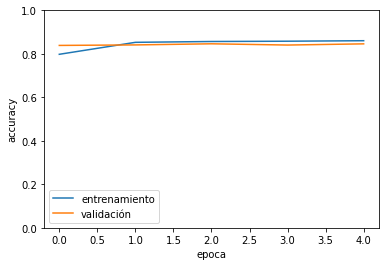

In [ ]:
# Evaluar las graficas del accuracy (precisión) y del error es una buena práctica.
# Estas graficas te dicen si el modelo necesita más épocas de entrenamiento, 
# si tienes overfitting o si es el óptimo.
plt.plot(M.history['accuracy'], label='entrenamiento')
plt.plot(M.history['val_accuracy'], label='validación')
plt.legend(loc='best')
plt.xlabel('epoca')
plt.ylabel('accuracy')
plt.ylim([0,1])
plt.show()

In [ ]:
np.amax(M.history['val_accuracy'])

0.8462186455726624

In [ ]:
# Prueba
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
pred = modelo3.predict(x_train[20])
predModa = stats.mode(pred)
print(pred[299])
print(predModa)
print(y_test[20])

[[0.27596736]]
ModeResult(mode=array([[[0.48406875]]], dtype=float32), count=array([[[12]]]))
1
